In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from dataloader import read_bci_data
from EEGnet import EEGnet
from DeepConvNet import DeepConvNet

import matplotlib.pyplot as plt

device = torch.device("cuda")
EPOCH = 300

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)
epoch: 1/300, Training loss: 0.7220523357391357, Training accuracy: 0.49351850152015686
Test loss: 2.0449202060699463, Test accuracy: 0.5
epoch: 2/300, Training loss: 2.013425588607788, Training accuracy: 0.5
Test loss: 0.6530055403709412, Test accuracy: 0.6370370388031006
epoch: 3/300, Training loss: 0.6303594708442688, Training accuracy: 0.6574074029922485
Test loss: 1.0703372955322266, Test accuracy: 0.5314814448356628
epoch: 4/300, Training loss: 1.0309609174728394, Training accuracy: 0.5342592597007751
Test loss: 1.1330064535140991, Test accuracy: 0.5305555462837219
epoch: 5/300, Training loss: 1.0969840288162231, Training accuracy: 0.5342592597007751
Test loss: 0.8333446383476257, Test accuracy: 0.5870370268821716
epoch: 6/300, Training loss: 0.7917858958244324, Training accuracy: 0.6074073910713196
Test loss: 0.6124076843261719, Test accuracy: 0.675000011920929
epoch: 7/300, Training loss: 0.579316258430481, Training accuracy: 

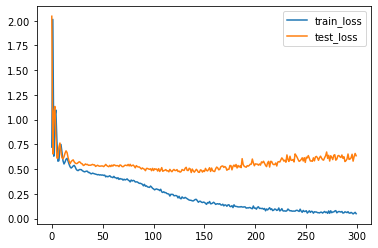

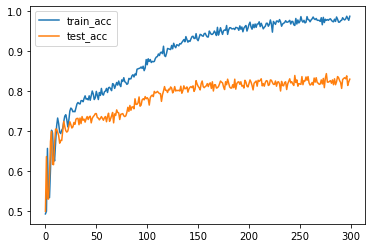

EEGnet(
  (firstconv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 51), stride=(1, 1), padding=(0, 25), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (depthwiseConv): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 1), stride=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (4): Dropout(p=0.25, inplace=False)
  )
  (separableConv): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 15), stride=(1, 1), padding=(0, 7), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0)
    (4): Dropout(p=0.25, inplace=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classify): Linear(in_features=736, out_features=2, bias=True)
)

In [3]:
net = EEGnet(nn.ReLU()).to(device)
#net = DeepConvNet(nn.ReLU()).to(device)

train_data, train_label, test_data, test_label = read_bci_data()

train_data = torch.Tensor(train_data).to(device)
train_label = torch.Tensor(train_label).type(torch.LongTensor).to(device)
test_data = torch.Tensor(test_data).to(device)
test_label = torch.Tensor(test_label).type(torch.LongTensor).to(device)

optimizer = torch.optim.Adam(net.parameters(), lr = 0.01)
loss = nn.CrossEntropyLoss()

train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(1, EPOCH+1):
    y_pred = net(train_data)
    output = loss(y_pred, train_label)
    net.zero_grad()
    output.backward()
    optimizer.step()

    _, y_pred = torch.max(y_pred.data, 1)
    accuracy = (y_pred == train_label).sum()/train_data.shape[0]
    train_loss.append(output.item())
    train_acc.append(accuracy)
    print(f"epoch: {epoch}/{EPOCH}, Training loss: {output.item()}, Training accuracy: {accuracy}")


    y_pred = net(test_data)
    output = loss(y_pred, test_label)
    _, y_pred = torch.max(y_pred.data, 1)
    accuracy = (y_pred == test_label).sum()/train_data.shape[0]
    test_loss.append(output.item())
    test_acc.append(accuracy)
    print(f"Test loss: {output.item()}, Test accuracy: {accuracy}")

plt.plot(train_loss, label="train_loss")
plt.plot(test_loss, label="test_loss")
plt.legend()
plt.show()
plt.plot(train_acc, label="train_acc")
plt.plot(test_acc, label="test_acc")
plt.legend()
plt.show()



net.eval()
